**Learning Objective**  
This tutorial has been written for learners that are new to SysML v2 modeling. The intent of this tutorial is to provide material for learning how to model basic SysML based engineering artifacts that are fundamental to combat system engineering and generation of system design documentation. The exercise is not meant to be exhaustive but provide enough basic content to learn how to build the SysML models.

**Top-Level Requirements (TLR) for the Surface Combat System (SCS)**  
The proposed user community wrote TLRs for a system to meet operational needs. These requirements are from the user but must be refined through systems engineering practices into SCS System and Subsystem documentation. Enter these requirements into the SCS model.
 
* The SCS shall have weapon systems to engage and negate targets across air and surface warfighting domains. [TLR 1]
* The SCS shall have sensors to detect air and surface targets. [TLR 2]
* The SCS shall have a combat management system to provide integrated command and control of combat system resources (e.g. sensors, weapons, external communications). [TLR 3]
* The SCS shall have an operational availability of 99.999%. [TLR 4]

In [1]:
package USS_Dahlgren_SCS_TLR{
    part def SCS;
    
    requirement 'SCS TLR'{
        doc /* Surface Combat System Top-Level Requirements (TLR) */
        requirement def <'TLR001'> 'SCS Weapons' {
            doc /* The SCS shall have weapon systems to engage and negate targets across 
            * air and surface warfighting domains. */
        }
        requirement def <'TLR002'> 'SCS Sensors' {
            doc /* The SCS shall have sensors to detect air and surface targets. */ 
        }
        requirement def <'TLR003'> 'CMS Integration' {
            doc /* The SCS shall have a Combat Management System (CMS) to provide integrated
            * command and control combat system resources (e.g. sensors, weapons, external
            * communications). */
        }
         requirement def <'TLR004'> 'SCS Availability' {
            doc /* The SCS shall have an operational availability of 99.999%. */
        }
    }    
}

Package USS_Dahlgren_SCS_TLR (dec278c1-b066-4380-bb55-4c93986e4d45)


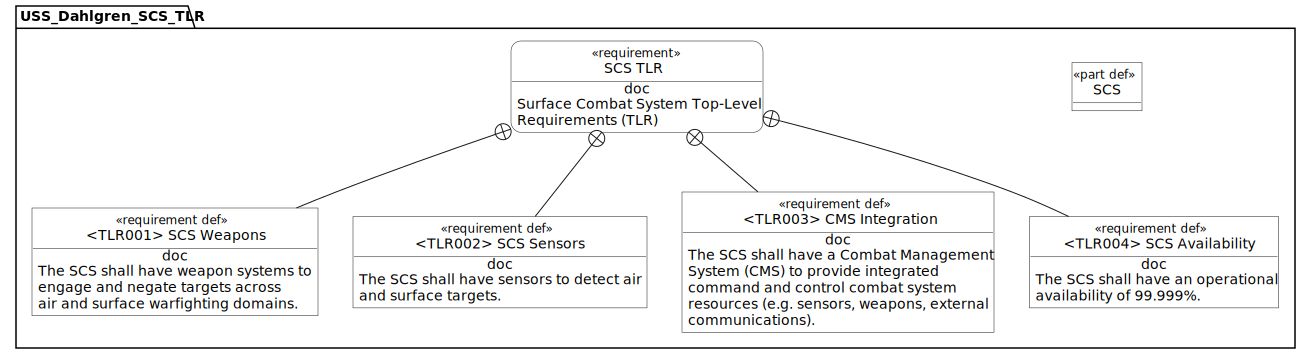

In [2]:
%viz --view=Tree USS_Dahlgren_SCS_TLR
// %viz USS_Dahlgren_TLR

**System Specification (SSS) for the SCS**  
Each TLR is further decomposed into “testable” system requirements for the SCS. A few are presented here. Please write 5 more using IEEE 29148 standard format practices. Enter these requirements into the model and show traceability within the model.  
  
29148-2018 - ISO/IEC/IEEE International Standard - Systems and software engineering -- Life cycle processes -- Requirements engineering
  
* The SCS shall engage and negate air targets. [SCS 1] Derived from TLR 1.
* The SCS shall detect air targets. [SCS 2] Derived from TLR 2.
* The SCS shall maintain an availability of 99.999% during normal operations. [SCS 3] Derived from TLR 4.


In [9]:
package SCS_SSS{
    part def SCS;
    
    requirement 'SCS SSS'{
        doc /* System Specification (SSS) for the Surface Combat System (SCS) */
        requirement def <'SCS001'> 'Engage Air Targets' {
            doc /* The SCS shall engage air targets. */
        }
        requirement def <'SCS002'> 'Detect Air Targets' {
            doc /* The SCS shall detect air targets. */ 
        }
        requirement def <'SCS003'> 'SCS Availability' {
            doc /* The SCS shall maintain an availability of 99.999 during normal operations. */
        }
    }    
}

Package SCS_SSS (96f7de2f-12aa-4dfc-a5ed-fabbfe31e52f)


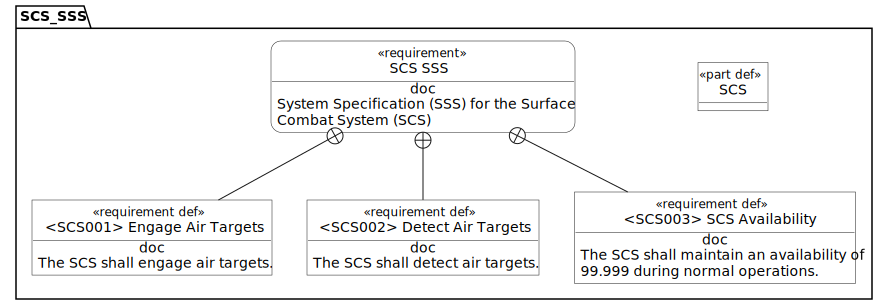

In [10]:
%viz --view=Tree SCS_SSS
// %viz USS_Dahlgren_TLR

**Stakeholder Concerns**  

_OPNAVINST 3500.38B Universal Navy Task List (UNTL)_  
_OPNAV ROC/POE Instructions_  
  
"As a **role**, I can **action with the system** so that **external benefit**"  
  
Required Operational Capabilities (ROC) were used to define user specific “action with the system.” ROCs provide a summary of capabilities expected on a ship class enabled through a combat system. Navy Tactical Actions (NTA) we’re used to define “external benefit.” NTAs are used to define Mission Essential Task (METLs) that must be accomplished by combined Naval Forces to win a campaign defined by a Joint Warfighting Commander.  
  
A review of the requirements was conducted with stakeholder and several “concerns” were identified. Here are a few to include in the model:  
 
* As a Surface Warfare Coordinator (SUWC), I can use my CMS to order the GWS/operator to engage a target with major caliber gunfire (ROC SUW 1.4) so that I can Attack Surface Targets (NTA 3.2.1.1).
* As a Anti-Air Warfare Coordinator (AAWC), I can use my CMS to order the Radar/operator to detect, track, and identify air target with radar and/or cooperative sensors (ROC AW 6.5) so that I can Maintain and Display Tactical Picture (NTA 5.1.3.1).  
  
As a result the following system level requirements were added before freezing the technical baseline:  
  
TBS  

Please update SCS model to reflect the new requirements and stakeholder concerns.  

In [5]:
package Stakeholder_Concerns{
    part def 'Warfare Area Coordinator';

    concern 'order surface target attack' {
        doc /* As a Surface Warfare Coordinator (SUWC), I can use my CMS to order the GWS/operator to
        * engage a targets with major caliber gunfire (ROC SUW 1.4) so that I can
        * Attack Surface Targets (NTA 3.2.1.1). */
        stakeholder suwc : 'Warfare Area Coordinator';
    }
    
    concern 'order air identification' {
        doc /* As a Anti-Air Warfare Coordinator (AAWC), I can use my CMS to order the Radar/operator to
        * detect, track, and identify air targets with radar and/or cooperative
        * sensors (ROC AW 6.5) so that I can Maintain and Display Tactical Picture (NTA 5.1.3.1). */
        stakeholder aawc: 'Warfare Area Coordinator';
    }
}

Package Stakeholder_Concerns (7e9f5116-b3f8-45cb-83eb-be7263bd4c68)


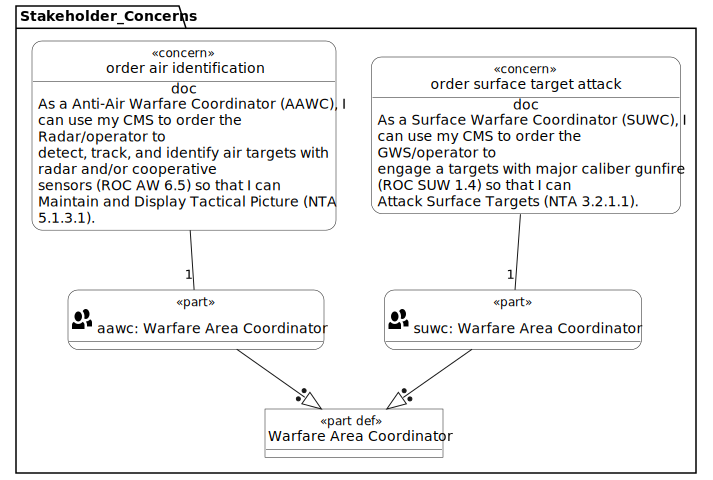

In [6]:
%viz Stakeholder_Concerns

**System Definition**  
  
It has been determined based upon the requirements and stakeholder concerns that the system will be composed of the following elements:  
  
* Combat Management System (CMS)
* Radar (RDR)
* External Communications (EXCOMM)
* Over-the-Horizon Weapon System (OTHWS)
* Display (DIS)
* Gun Weapon System (GWS)

In [11]:
package USS_Dahlgren_Architecture{
    import ScalarValues::*;
    
    enum def CS_Mode {
        enum standby;
        enum tactical;
        enum training;
        enum test;
    }
    
    part USS_Dahlgren{
        part 'Surface Combat System (SCS)'{
            part CMS{
                doc 'CMS'
                    /* This is the Combat Management System. */
                attribute operationalMode : CS_Mode;
                part DIS [5]{
                    doc 'DIS'
                        /* This is the Display Subsytem. */
                }
            }
            
            part RDR{
                doc 'RDR'
                    /* This is the Radar Subsystem. */
            }
            part EXCOMM{
                doc 'EXCOMM'
                    /* This is the External Communications Subsystem. */
            }
            
            part OTHWS [2]{
                attribute num_missiles : ScalarValues::Real;
                doc 'OTHWS'
                    /* This is the Over The Horizon Weapon Subsystem. */
            }
            part GWS [2]{
                doc 'GWS'
                    /* This is the Gun Weapon System. */
            }
            
        }
    }
}

Package USS_Dahlgren_Architecture (5edfa1e6-4e5a-4f24-b98b-35e02b94b678)


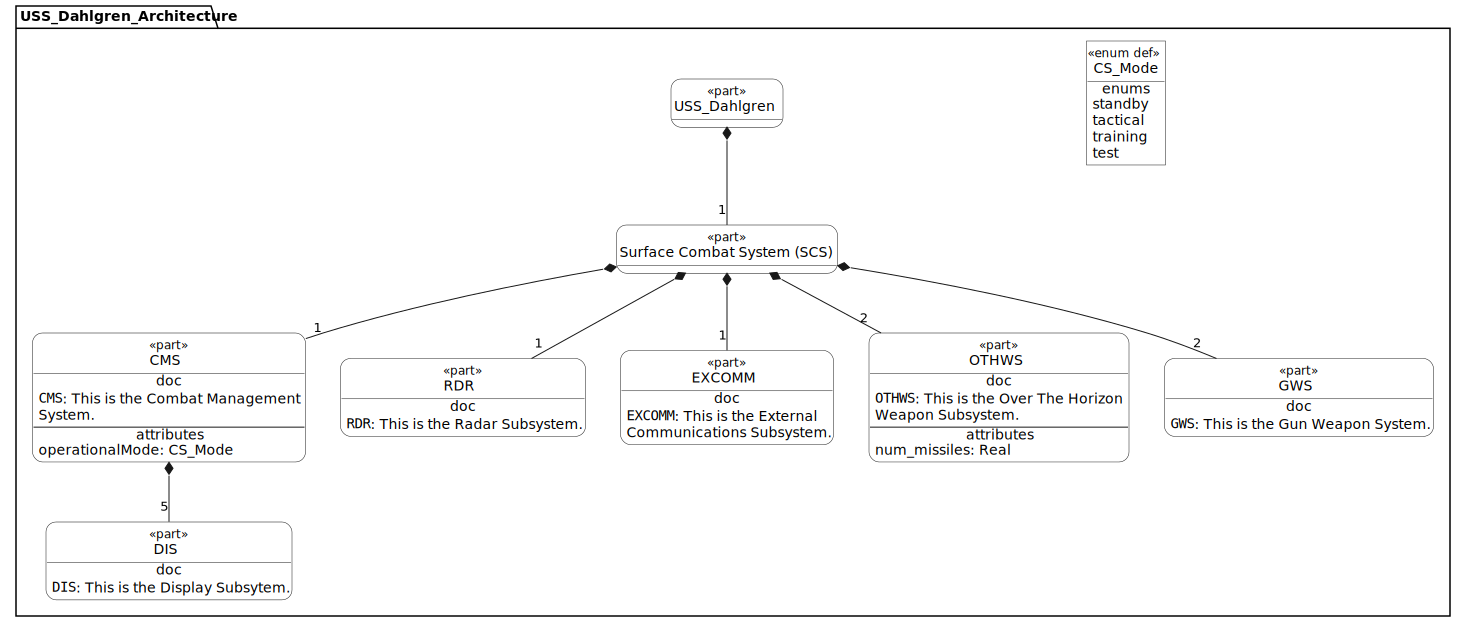

In [12]:
%viz --view=Tree USS_Dahlgren_Architecture